In [20]:
using Plots
using QuadGK
using Roots
include("./ring_np_num.jl")
gr()

Plots.GRBackend()

In [21]:
dir = "more_players_no_inc/"
filenames = readdir(dir);
filenames = [file for file in filenames if file[end] == '2']

213-element Array{String,1}:
 "a=1.0_b=1.0_c=0.0_angCut=3.141592653589793_Pc=16_dt=1.0_games=1000_steps=100.jld2"
 "a=1.0_b=1.0_c=0.0_angCut=3.141592653589793_Pc=4_dt=1.0_games=1000_steps=100.jld2"
 "a=1.0_b=1.0_c=0.0_angCut=3.141592653589793_Pc=8_dt=1.0_games=1000_steps=100.jld2"
 "a=1.0_b=1.1_c=0.0_angCut=3.141592653589793_Pc=16_dt=1.0_games=1000_steps=100.jld2"
 "a=1.0_b=1.1_c=0.0_angCut=3.141592653589793_Pc=4_dt=1.0_games=1000_steps=100.jld2"
 "a=1.0_b=1.1_c=0.0_angCut=3.141592653589793_Pc=8_dt=1.0_games=1000_steps=100.jld2"
 "a=1.0_b=1.2_c=0.0_angCut=3.141592653589793_Pc=16_dt=1.0_games=1000_steps=100.jld2"
 "a=1.0_b=1.2_c=0.0_angCut=3.141592653589793_Pc=4_dt=1.0_games=1000_steps=100.jld2"
 "a=1.0_b=1.2_c=0.0_angCut=3.141592653589793_Pc=8_dt=1.0_games=1000_steps=100.jld2"
 "a=1.0_b=1.3_c=0.0_angCut=3.141592653589793_Pc=16_dt=1.0_games=1000_steps=100.jld2"
 "a=1.0_b=1.3_c=0.0_angCut=3.141592653589793_Pc=4_dt=1.0_games=1000_steps=100.jld2"
 "a=1.0_b=1.3_c=0.0_angCut=3.14159265358979

In [22]:
b_array = []
player_array = []
share_array = []
match_array = []

for filename in filenames
    result = load_sim(dir*filename)
    b = result[2].b
    p = result[2].player_count
    push!(b_array, b)
    push!(player_array, p)
    push!(share_array, result[1][1])
    push!(match_array, result[1][2])
end

sorted = sortperm(player_array)

b_array = reshape(b_array[sorted], :, 3)'
player_array = reshape(player_array[sorted], :, 3)'
share_array = reshape(share_array[sorted], :, 3)
match_array = reshape(match_array[sorted], :, 3)

#sorted2 = sortperm(player_array[1,:])

#b_array = b_array[:, sorted2]
#player_array = player_array[:, sorted2]
#share_array = share_array[sorted2, :]
#match_array = match_array[sorted2, :];

In [23]:
player_array

3×71 LinearAlgebra.Adjoint{Any,Array{Any,2}}:
  4   4   4   4   4   4   4   4   4  …   4   4   4   4   4   4   4   4   4
  8   8   8   8   8   8   8   8   8      8   8   8   8   8   8   8   8   8
 16  16  16  16  16  16  16  16  16     16  16  16  16  16  16  16  16  16

In [24]:
b_array

3×71 LinearAlgebra.Adjoint{Any,Array{Any,2}}:
 1.0  1.1  1.2  1.3  1.4  1.5  1.6  1.7  …  7.4  7.5  7.6  7.7  7.8  7.9  8.0
 1.0  1.1  1.2  1.3  1.4  1.5  1.6  1.7     7.4  7.5  7.6  7.7  7.8  7.9  8.0
 1.0  1.1  1.2  1.3  1.4  1.5  1.6  1.7     7.4  7.5  7.6  7.7  7.8  7.9  8.0

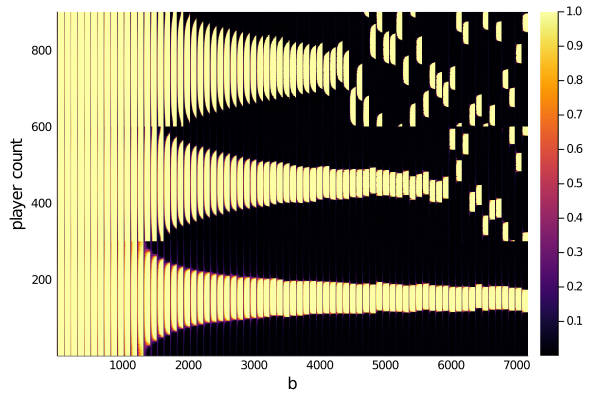

In [25]:
test_share = hvcat(71, share_array...)
heatmap(test_share, xlabel="b", ylabel="player count")

In [26]:
b_array[2, 25]

3.4

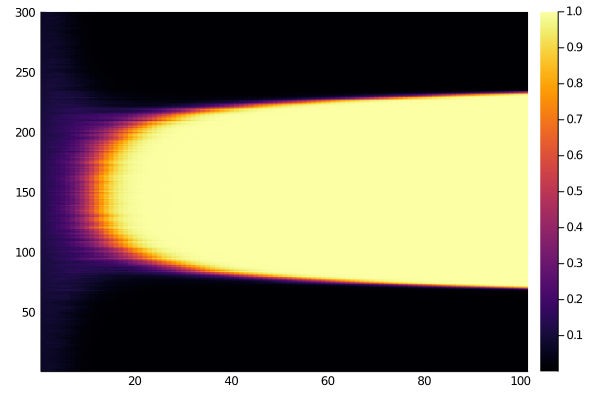

In [27]:
heatmap(share_array[25, 2])

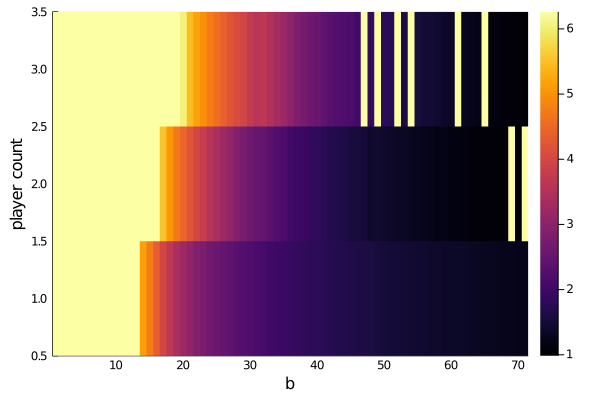

In [28]:
function simple_fitting(ϕ, p, threshold=0.5)
    places = p.>threshold
    larger_range = ϕ[places]
    if length(larger_range) == 0
        return 0, 0
    else
        return larger_range[1], larger_range[end]
    end
end;

widths = zeros(size(share_array))

ϕ_res = size(share_array[1])[1]
ϕ = LinRange(0,2π, ϕ_res+1)[1:end-1]

for (i, x) in enumerate(share_array)
    params = simple_fitting(ϕ, x[:,end])
    widths[i] = (params[2] - params[1])
end


heatmap(widths', xlabel="b", ylabel="player count")

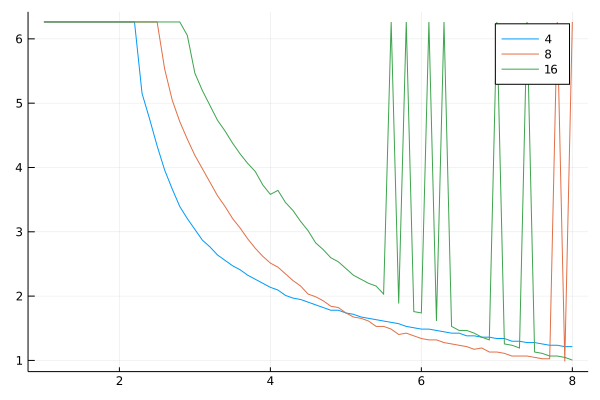

In [29]:
plot(1:0.1:8, widths, labels=[4 8 16])

In [30]:
b_array

3×71 LinearAlgebra.Adjoint{Any,Array{Any,2}}:
 1.0  1.1  1.2  1.3  1.4  1.5  1.6  1.7  …  7.4  7.5  7.6  7.7  7.8  7.9  8.0
 1.0  1.1  1.2  1.3  1.4  1.5  1.6  1.7     7.4  7.5  7.6  7.7  7.8  7.9  8.0
 1.0  1.1  1.2  1.3  1.4  1.5  1.6  1.7     7.4  7.5  7.6  7.7  7.8  7.9  8.0

In [31]:
dir2 = "more_players_high_prob/"
filenames2 = readdir(dir2);
filenames2 = [file for file in filenames2 if (file[end] == '2')]

57-element Array{String,1}:
 "a=1.0_b=1.0_c=0.0_angCut=3.141592653589793_Pc=16_dt=1.5_games=1000_steps=100.jld2"
 "a=1.0_b=1.2_c=0.0_angCut=3.141592653589793_Pc=16_dt=1.5_games=1000_steps=100.jld2"
 "a=1.0_b=1.4_c=0.0_angCut=3.141592653589793_Pc=16_dt=1.5_games=1000_steps=100.jld2"
 "a=1.0_b=1.6_c=0.0_angCut=3.141592653589793_Pc=16_dt=1.5_games=1000_steps=100.jld2"
 "a=1.0_b=1.8_c=0.0_angCut=3.141592653589793_Pc=16_dt=1.5_games=1000_steps=100.jld2"
 "a=1.0_b=2.0_c=0.0_angCut=3.141592653589793_Pc=16_dt=1.5_games=1000_steps=100.jld2"
 "a=1.0_b=2.2_c=0.0_angCut=3.141592653589793_Pc=16_dt=1.5_games=1000_steps=100.jld2"
 "a=1.0_b=2.4_c=0.0_angCut=3.141592653589793_Pc=16_dt=1.5_games=1000_steps=100.jld2"
 "a=1.0_b=2.6_c=0.0_angCut=3.141592653589793_Pc=16_dt=1.5_games=1000_steps=100.jld2"
 "a=1.0_b=2.8_c=0.0_angCut=3.141592653589793_Pc=16_dt=1.5_games=1000_steps=100.jld2"
 "a=1.0_b=3.0_c=0.0_angCut=3.141592653589793_Pc=16_dt=1.5_games=1000_steps=100.jld2"
 "a=1.0_b=3.2_c=0.0_angCut=3.14159265

In [32]:
b_array2 = []
player_array2 = []
share_array2 = []
match_array2 = []

for filename in filenames2
    result = load_sim(dir2*filename)
    b = result[2].b
    p = result[2].player_count
    if result[2].dt==1
        push!(b_array2, b)
        push!(player_array2, p)
        push!(share_array2, result[1][1])
        push!(match_array2, result[1][2])
    end
end

sorted2 = sortperm(b_array2)

b_array2 = b_array2[sorted2]
player_array2 = player_array2[sorted2]
share_array2 = share_array2[sorted2]
match_array2 = match_array2[sorted2]

#sorted2 = sortperm(player_array[1,:])

#b_array = b_array[:, sorted2]
#player_array = player_array[:, sorted2]
#share_array = share_array[sorted2, :]
#match_array = match_array[sorted2, :];

In [33]:
b_array2

21-element Array{Any,1}:
 4.0
 4.2
 4.4
 4.6
 4.8
 5.0
 5.2
 5.4
 5.6
 5.8
 6.0
 6.2
 6.4
 6.6
 6.8
 7.0
 7.2
 7.4
 7.6
 7.8
 8.0

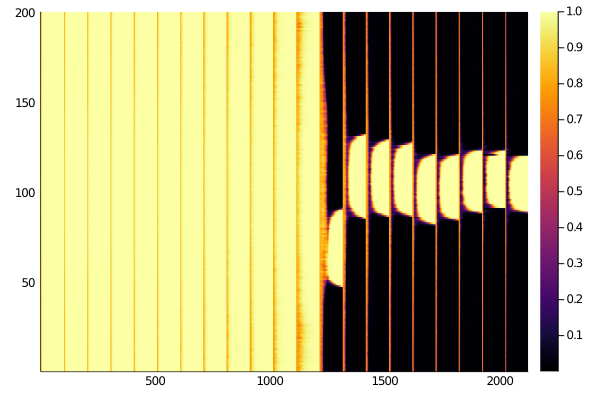

In [34]:
test_2 = hcat(share_array2...)
heatmap(test_2)

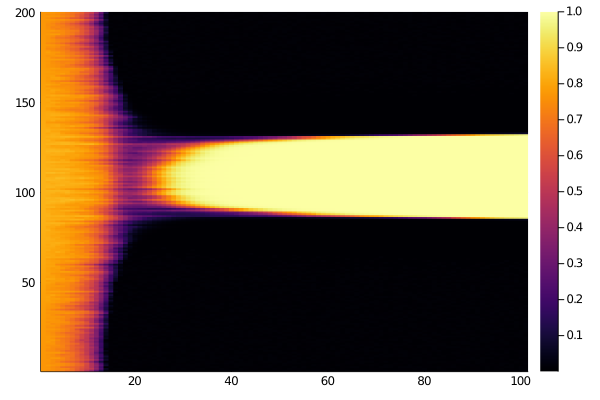

In [35]:
heatmap(share_array2[14])

In [36]:
heatmap

heatmap (generic function with 1 method)

In [37]:
b_array2[12]

6.2

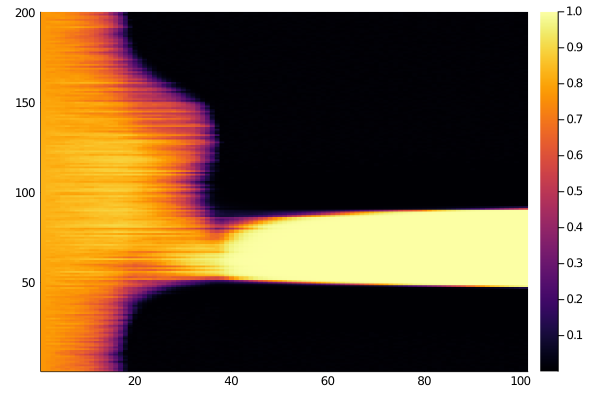

In [38]:
heatmap(share_array2[13])

In [85]:
#dir3 = "more_players_no_inc_clamped/smoothing_adaptive_t/"
#dir3 = "more_players_no_inc_clamped/different_start/"
#dir3 = "more_players_no_inc_clamped/tracking/"
#dir3 = "more_players_no_inc_clamped/"
dir3 = "more_players_no_inc_clamped/theo_start/"


filenames3 = readdir(dir3)
filenames3 = [file for file in filenames3 if (file[end] == '2')]

b_array3 = []
player_array3 = []
share_array3 = []
match_array3 = []

for filename in filenames3
    result = load_sim(dir3*filename)
    b = result[2].b
    p = result[2].player_count
    if true
        push!(b_array3, b)
        push!(player_array3, p)
        push!(share_array3, result[1][1])
        push!(match_array3, result[1][2])
    end
end

sorted3 = sortperm(b_array3)

b_array3 = b_array3[sorted3]
player_array3 = player_array3[sorted3]
share_array3 = share_array3[sorted3]
match_array3 = match_array3[sorted3]

#sorted3 = sortperm(player_array[1,:])

#b_array = b_array[:, sorted3]
#player_array = player_array[:, sorted3]
#share_array = share_array[sorted3, :]
#match_array = match_array[sorted3, :];

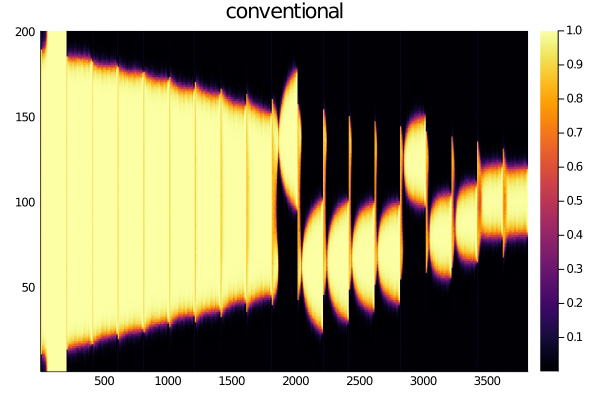

In [86]:
test3 = hcat(share_array3...)
heatmap(test3, title="conventional")

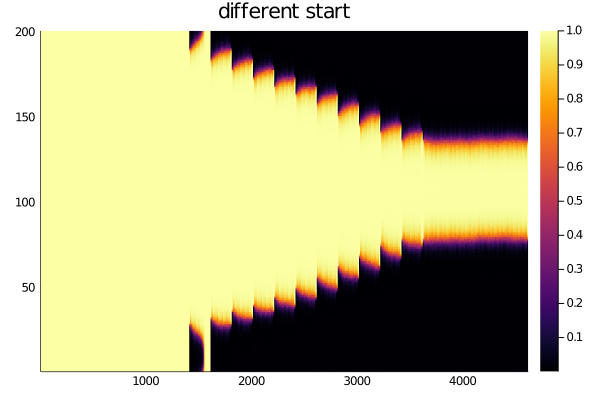

In [100]:
test3 = hcat(share_array3...)
heatmap(test3, title="different start")

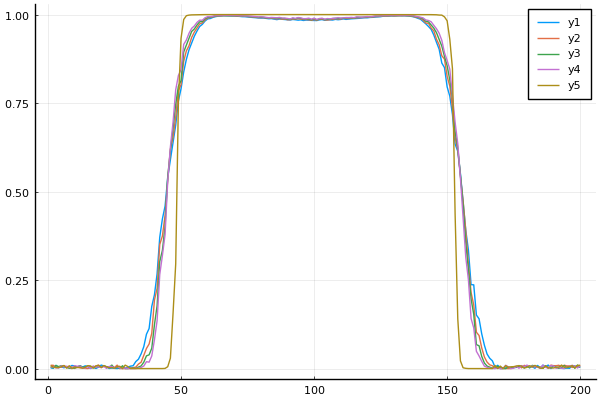

In [46]:
plot(share_array3[15][:,40])
plot!(share_array3[15][:,41])
plot!(share_array3[15][:,42])
plot!(share_array3[15][:,43])
plot!(share_array3[15][:,end])

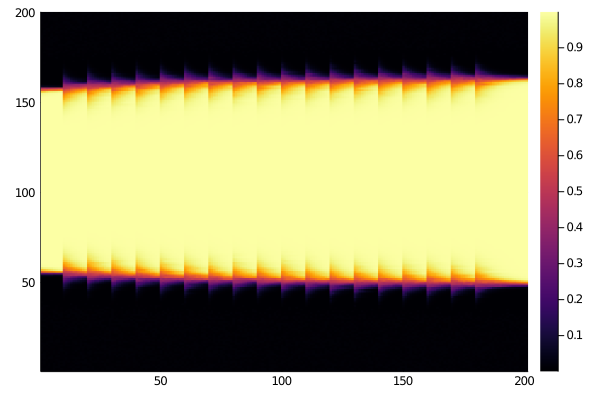

In [122]:
heatmap(share_array3[14])

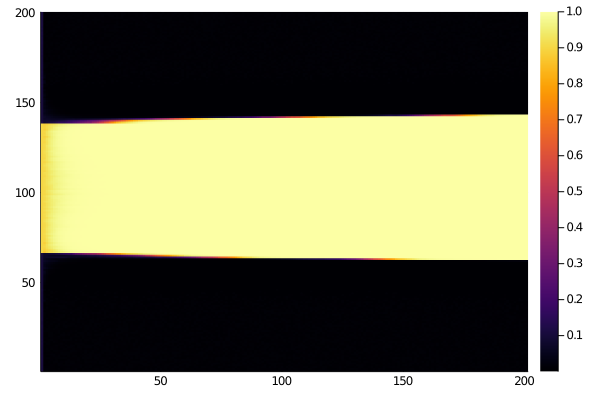

In [120]:
heatmap(share_array3[14])

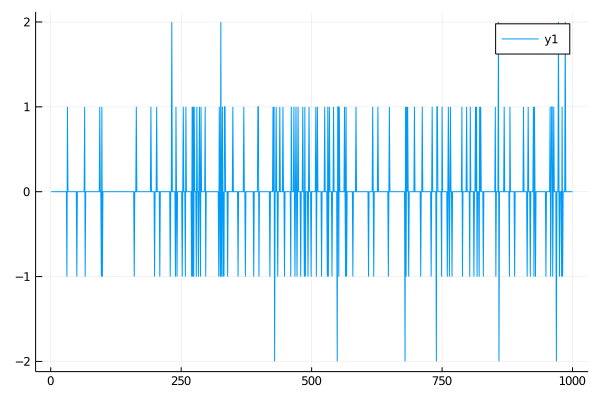

In [105]:
widths_time = []
for i in eachcol(share_array3[19])
    params = simple_fitting(1:length(i[:,1]), i[:,end])
    push!(widths_time, params[2] - params[1])
end
plot(diff(widths_time))

In [37]:
box_start = share_array3[15][:,end];

In [38]:
normal_start = share_array3[15][:,end];

In [69]:
widths_theo = []
for i in share_array3
    params = simple_fitting(1:length(i[:,1]), i[:,end])
    push!(widths_theo, params[2] - params[1])
end

In [100]:
bs3 = [5.05444219872613, 4.710918645455162, 4.537178472614509, 4.510729898344252, 4.562762422780707, 4.657917600352588, 4.82929475195356, 4.937192723284227, 5.045856075743149, 5.184410616301439, 5.3845027523449955, 5.513534940740992, 5.656635506657533, 5.761372042762804, 5.879800280247546, 6.02326933845243, 6.089463159941491, 6.197844454927583, 6.288457440609686, 6.299205035997295, 6.437170190292862]

21-element Array{Float64,1}:
 5.05444219872613
 4.710918645455162
 4.537178472614509
 4.510729898344252
 4.562762422780707
 4.657917600352588
 4.82929475195356
 4.937192723284227
 5.045856075743149
 5.184410616301439
 5.3845027523449955
 5.513534940740992
 5.656635506657533
 5.761372042762804
 5.879800280247546
 6.02326933845243
 6.089463159941491
 6.197844454927583
 6.288457440609686
 6.299205035997295
 6.437170190292862

In [105]:
bs4 = [6.8668114653749575, 6.807966975486485, 6.8685239722114, 6.7568478371014224, 6.882216864210039, 6.776200809728162, 6.903974100774295, 6.778914281683019, 6.82737912421426, 6.847761132180151, 6.979335177880188, 7.001016049668051, 6.980627505873127, 7.113192322512367, 7.200978689460493, 7.3128085234202596, 7.3165266795275254, 7.554616567110886, 7.566398648865932, 7.814834894625881, 8.067173496061182]

21-element Array{Float64,1}:
 6.8668114653749575
 6.807966975486485
 6.8685239722114
 6.7568478371014224
 6.882216864210039
 6.776200809728162
 6.903974100774295
 6.778914281683019
 6.82737912421426
 6.847761132180151
 6.979335177880188
 7.001016049668051
 6.980627505873127
 7.113192322512367
 7.200978689460493
 7.3128085234202596
 7.3165266795275254
 7.554616567110886
 7.566398648865932
 7.814834894625881
 8.067173496061182

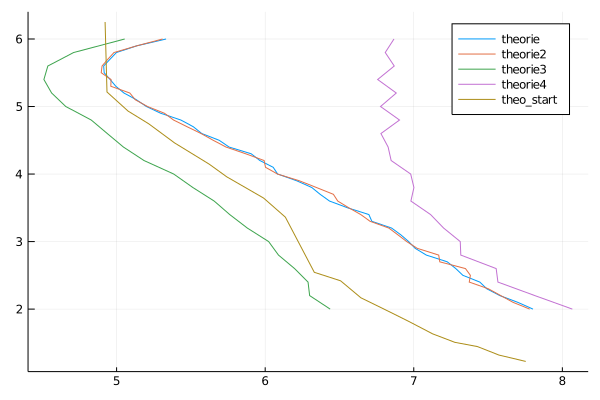

In [106]:
plot(bs, 6:-0.1:2, label="theorie")
plot!(bs2, 6:-0.1:2, label="theorie2")
plot!(bs3, 6:-0.2:2, label="theorie3")
plot!(bs4, 6:-0.2:2, label="theorie4")

plot!(b4, widths_theo ./ 200 .*2π, label="theo_start")